In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# Load the pre-generated customer data CSV
df = pd.read_csv('customer_data_large.csv')

In [5]:
# Check the first few rows to verify the data
print(df.head())

   Customer_ID   Age  Tenure  Monthly_Usage  Complaints  Returns  \
0            1  56.0      29      69.302250           3        0   
1            2  69.0      44     215.284417           4        2   
2            3  46.0      53     378.077243           1        2   
3            4  32.0      24      44.793756           0        0   
4            5  60.0      58      49.288207           3        1   

   Emails_Opened  Daily_Logins  Sensor_Triggers Event_Timestamp  Churn  
0            9.0             2                9      25-01-2024      0  
1            0.0             1                2      18-05-2024      1  
2            7.0             1                3      17-01-2024      0  
3            3.0             3                0      05-02-2024      0  
4            8.0             2                3      05-04-2024      0  


In [7]:
# Preprocessing: Handling missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
df[['Age', 'Monthly_Usage', 'Emails_Opened']] = imputer.fit_transform(df[['Age', 'Monthly_Usage', 'Emails_Opened']])

# Feature Selection: Drop non-numeric or irrelevant features (like Customer_ID and Event_Timestamp)
df = df.drop(columns=['Customer_ID', 'Event_Timestamp'])

In [9]:
# Feature Scaling: Standardize numeric features
scaler = StandardScaler()
df[['Age', 'Tenure', 'Monthly_Usage', 'Complaints', 'Returns', 'Emails_Opened', 'Daily_Logins', 'Sensor_Triggers']] = scaler.fit_transform(
    df[['Age', 'Tenure', 'Monthly_Usage', 'Complaints', 'Returns', 'Emails_Opened', 'Daily_Logins', 'Sensor_Triggers']]
)

In [11]:
# Split the data into train and test sets (80% training, 20% testing)
X = df.drop(columns='Churn')  # Features
y = df['Churn']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Model: Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    class_weight='balanced', 
    oob_score=True)

In [15]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=42)

In [17]:
# Evaluate the model
rf_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       305
           1       0.98      0.88      0.93        95

    accuracy                           0.97       400
   macro avg       0.97      0.94      0.95       400
weighted avg       0.97      0.97      0.97       400

Random Forest Confusion Matrix:
 [[303   2]
 [ 11  84]]


In [19]:
# OOB Score (Out-of-Bag Score)
print(f"Out-of-Bag Score: {rf_model.oob_score_}")

Out-of-Bag Score: 0.955


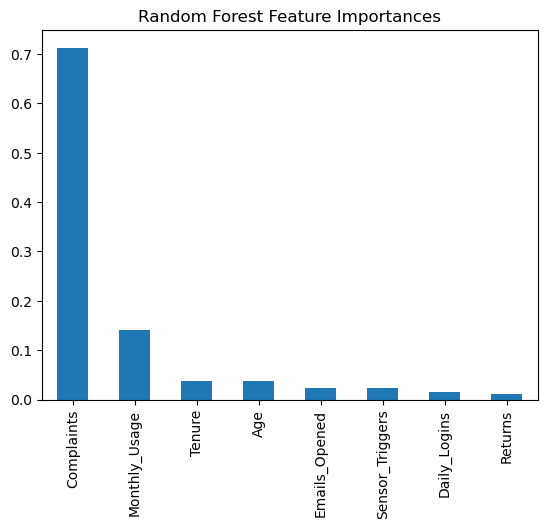

In [21]:
# Feature Importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances.plot(kind='bar', title="Random Forest Feature Importances")
plt.show()

In [25]:
import joblib
# Save the model
joblib.dump(rf_model, 'models/random_forest_model_v1.pkl')


['models/random_forest_model_v1.pkl']